In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [10]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [12]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

In [15]:
y_true = 0.5*x_data+5+noise

In [36]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)

In [4]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_summary_steps': 100, '_task_id': 0, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_is_chief': True, '_evaluation_master': '', '_tf_random_seed': None, '_task_type': 'worker', '_experimental_distribute': None, '_session_creation_timeout_secs': 7200, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff6883a1b38>, '_save_checkpoints_secs': 600, '_experimental_max_worker_delay_secs': None, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_master': '', '_protocol': None, '_train_distribute': None, '_eval_distribute': None, '_model_dir': '/var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc', '_keep_checkpoint_every_n_hours': 10000, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_log_step_count_steps': 100, '_device_fn': None}


In [5]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [17]:
print(x_train.shape)

(700000,)


In [19]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=None,shuffle=True)

In [20]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [21]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [24]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6000 into /var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc/model.ckpt.
INFO:tensorflow:loss = 8.980874, step = 6001
INFO:tensorflow:global_step/sec: 1179.09
INFO:tensorflow:loss = 7.6903353, step = 6101 (0.086 sec)
INFO:tensorflow:global_step/sec: 1433.9
INFO:tensorflow:loss = 9.638209, step = 6201 (0.069 sec)
INFO:tensorflow:global_step/sec: 1382.76
INFO:tensorflow:loss = 6.4071364, step = 6301 (0.072 sec)
INFO:tensorflow:global_step/sec: 1491.27
INFO:tensorflow:loss = 4.4818754, step = 6401 (0.067 sec)
INFO:tensorflow:global_step/sec: 1395.65
INFO:tensorflow:loss = 3.671723, step = 65

In [25]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-05T23:41:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc/model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-05-23:41:31
INFO:tensorflow:Saving dict for global step 7000: average_loss = 0.98752475, global_step = 7000, label/mean = 7.497894, loss = 7.900198, prediction/mean = 7.481656
INFO:tensorflow:Saving '

In [26]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-05T23:42:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc/model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-05-23:42:25
INFO:tensorflow:Saving dict for global step 7000: average_loss = 0.984388, global_step = 7000, label/mean = 7.4612284, loss = 7.875104, prediction/mean = 7.463824
INFO:tensorflow:Saving 'c

In [28]:
print('Training data metrics')
print(train_metrics)

Training data metrics
{'average_loss': 0.98752475, 'loss': 7.900198, 'prediction/mean': 7.481656, 'global_step': 7000, 'label/mean': 7.497894}


In [29]:
print('Eval metrics')
print(eval_metrics)

Eval metrics
{'average_loss': 0.984388, 'loss': 7.875104, 'prediction/mean': 7.463824, 'global_step': 7000, 'label/mean': 7.4612284}


In [30]:
brand_new_data = np.linspace(0,10,10)

In [32]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [34]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vr/zg13shqn58z_yns0z1p22r0w0000gn/T/tmpr8qc7pwc/model.ckpt-7000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [35]:
predictions

[array([5.01319], dtype=float32),
 array([5.5614905], dtype=float32),
 array([6.1097913], dtype=float32),
 array([6.658092], dtype=float32),
 array([7.2063932], dtype=float32),
 array([7.7546935], dtype=float32),
 array([8.302995], dtype=float32),
 array([8.851295], dtype=float32),
 array([9.399596], dtype=float32),
 array([9.947897], dtype=float32)]

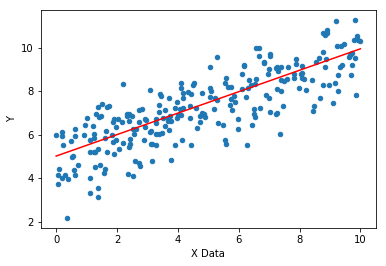

In [39]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')